(256, 256)
int16
[[156 159 158 155 158 156 159 158 157 158]
 [160 154 157 158 157 159 158 158 158 160]
 [156 159 158 155 158 156 159 158 157 158]
 [160 154 157 158 157 159 158 158 158 160]
 [156 153 155 159 159 155 156 155 155 157]
 [155 155 155 157 156 159 152 158 156 158]
 [156 153 157 156 153 155 154 155 157 156]
 [159 159 156 158 156 159 157 161 162 157]
 [158 155 158 154 156 160 162 155 159 161]
 [155 154 157 158 160 160 159 160 158 161]]
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0 -1  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  1]
 [ 0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 

Text(0.5, 1.0, 'My filtered Image')

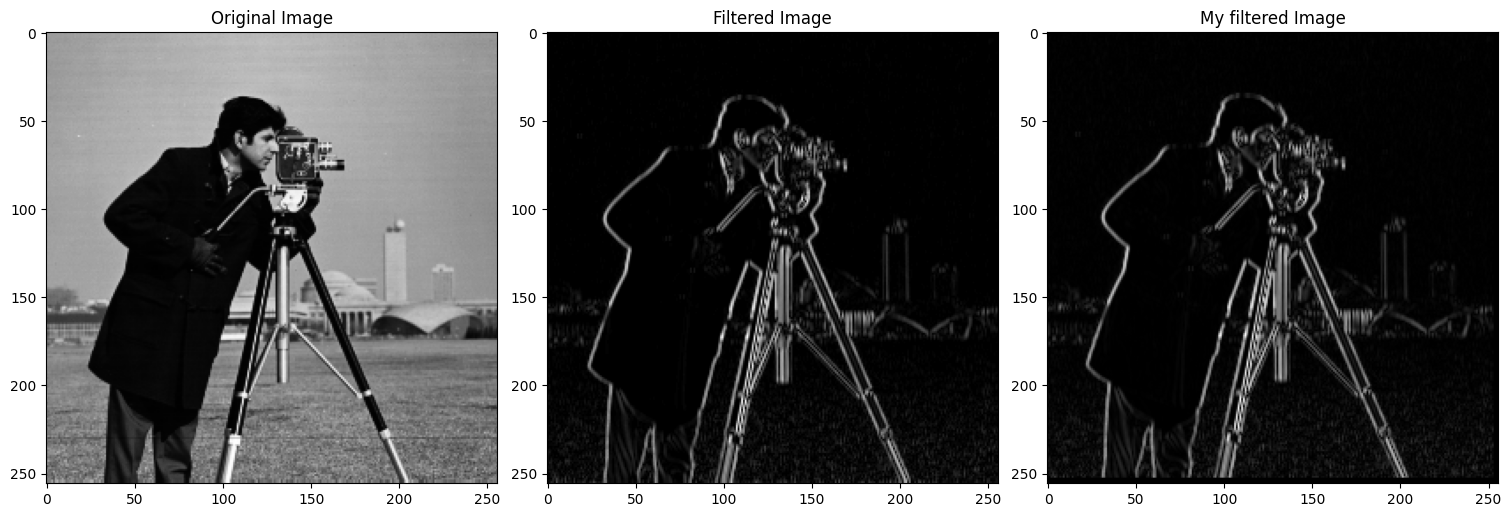

In [72]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def suodata(kuva):
    print("suodatuksessa:")
    print()
    print("suodattimet: ")
    suodatin1 = np.array([[1/9,1/9,1/9],
                          [1/9,1/9,1/9],
                          [1/9,1/9,1/9]])
    suodatin2 = np.array([[-1/9, 0, 1/9],
                          [-1/9, 0, 1/9],
                          [-1/9, 0, 1/9]])

    suodatettu = np.zeros((kuva.shape[0], kuva.shape[1]))
    pieni_slice = kuva[0:3,0:3]
    print(pieni_slice)
    print(pieni_slice.flatten())
    print(np.sum(pieni_slice.flatten()))
    mrow=0
    mcol=0
    for cols in range(kuva.shape[0]-3):
        for rows in range(kuva.shape[1]-3):
            
            value = (kuva[cols:cols+3, rows:rows+3] * suodatin1[:,:])
            value = (kuva[cols:cols+3, rows:rows+3] * suodatin2[:,:])
            #print(np.sum(value))
            suodatettu[cols][rows] = np.sum(value)
    print(kuva.shape)
    print(suodatettu.shape)
    print(suodatettu[0:10,0:10])
    suodatettu=np.abs(suodatettu)
    return suodatettu

# Lue kuva tiedostosta
image = Image.open('./cameraman.png')

# Muunna kuva NumPy-taulukoksi
image_array = np.array(image,dtype=np.int16)
print(image_array.shape)
print(image_array.dtype)
print(image_array[0:10,0:10])

filter_kernel1 = np.array([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]])

filter_kernel2 = np.array([[-1/9, 0, 1/9],
                          [-1/9, 0, 1/9],
                          [-1/9, 0, 1/9]])

# Suodata kuva käyttämällä SciPy:n convolve-funktiota
filtered_image1 = convolve(image_array, filter_kernel1)
filtered_image2 = convolve(image_array, filter_kernel2)
filtered_image3 = np.abs(filtered_image2)
print(filtered_image2[0:10,0:10])
print(filtered_image3[0:10,0:10])
print("suodatetun kuvan koko = ",filtered_image3.shape)





fig, ax = plt.subplots(1,3,figsize=(15,15), constrained_layout=True)

ax[0].imshow(image_array, cmap='gray')
ax[1].imshow(filtered_image3, cmap='gray')

ax[0].set_title('Original Image')
ax[1].set_title('Filtered Image')

suodatettu=suodata(image_array)

ax[2].imshow(suodatettu,cmap='gray')
ax[2].set_title('My filtered Image')
#fig.set_facecolor('lightsteelblue')


# Tehtävä
## Tee aliohjelma suodatin(kuva,suodatin), joka ottaa inputtina 2D kuvan. Ohjelma selvittää kuvasta kuinka monta riviä ja saraketta kuvassa on. Tämän jälkeen suodatin aliohjelma suodattaa kuvan 3x3 kokoisella suodattimella. Voit toteuttaa suodatuksen vähän helpommin, eli esim 256*256 kokoinen kuva saa pienentyä 254 X 254 kokoiseksi suodatetuksi kuvaksi. Testaa tekemäsi suodatin cameraman kuvalla ja tuloksen pitäisi tietysti olla samanlainen kuin edellisessä esimerkissä.

100
[ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.
 -0.80901699 -0.30901699  0.30901699  0.80901699]


Text(0.5, 1.0, 'Sin 1. vertailusignaali')

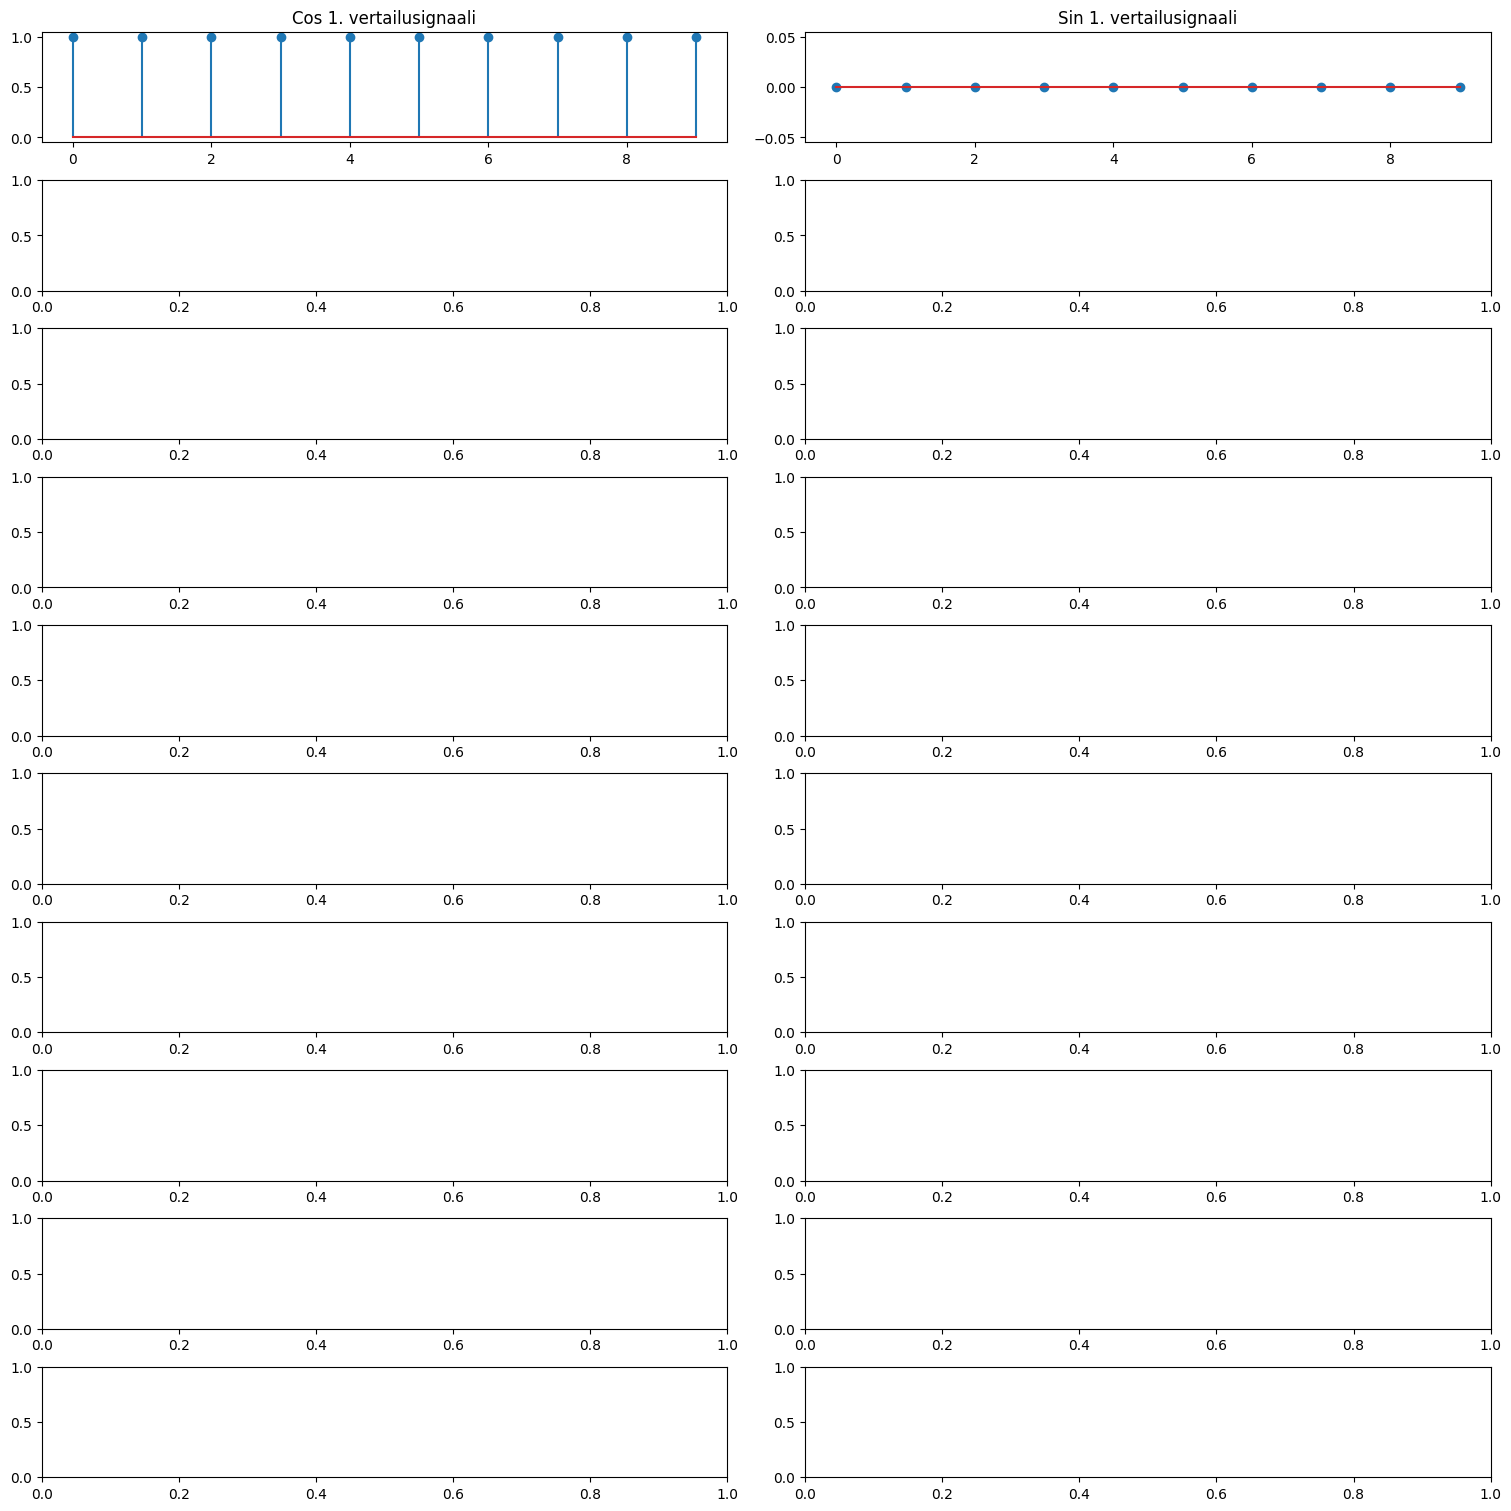

In [8]:
import numpy as np
import matplotlib.pyplot as plt
Fs = 100
Ts =1/Fs
N = 10

t = np.arange(0,1,Ts)  # tämä luo 100 aika-akselin näytettä
M = len(t)
print(M)
sig = np.cos(2*np.pi*10*t)
testiSignaali = sig[0:N]
print(testiSignaali)

i = complex(0,1)
k = 0
vertailuSignaali = np.zeros(N, dtype=complex)
for n in range(N):
  vertailuSignaali[n] = np.exp((-i*2*np.pi*k*n)/ N)


fig, ax = plt.subplots(10,2,figsize=(15,15), constrained_layout=True)

ax[0,0].stem(np.real(vertailuSignaali))
ax[0,1].stem(np.imag(vertailuSignaali))

ax[0,0].set_title('Cos 1. vertailusignaali')
ax[0,1].set_title('Sin 1. vertailusignaali')






# Tehtävä 2
## Edellä annettu esimerkki tulostaa kuvan, jossa on kymmenellä rivillä yhteensä 20 akselistoa, joihin datapisteitä voi tulostaa. Esimerkissä on käytetty matplotlib-kírjaston monimutkaisempaa versiota, jolla saadaan enemmän mahdollisuuksia kuvan tulostuksessa.

## Sinun tehtävänäsi on täyttää loput 9 kuvariviä eli 18 akselia 10-pisteisen fourier muunnoksen vertailusignaaleilla.

## Kun kaikki 10 vertailusignaalia on tehty, niin selvitä mikä vertailusignaaleista muistuttaa testisignaalia.

## Ja kun edelliset on tehty yritä tehdä omaFourier -aliohjelma, jolla saat laskettua ihan samat tulokset testisignaalille kuin np.fft.fft() funktiolla.